In [1]:
import numpy as np
import matplotlib.pyplot as plt

Problem 1

In [2]:
epsilon = 0.05
dvc = 10
current_N = 1

In [3]:
def get_omega(N, dvc, delta = 0.05):
    return ((8 / N) * np.log( (4 * (2 * N) ** dvc) / (delta) )) ** 0.5

In [4]:
while get_omega(current_N, dvc) >= epsilon:
    current_N += 1

current_N

452957

Problem 2

In [5]:
dvc_fixed = 50
delta_fixed = 0.05
large_N = np.linspace(start=3, stop=10000, dtype="float64")

In [6]:
log_mh = lambda N, dvc, constant: dvc * np.log(constant * N)

In [7]:
vc_bound = lambda N: np.sqrt((8 / N) * (np.log(4) + log_mh(N, dvc_fixed, 2) - np.log(delta_fixed)))

In [8]:
radermacher_bound = lambda N: np.sqrt((2 / N) * (np.log(2 * N) + log_mh(N, dvc_fixed, 1))) + np.sqrt((2 / N) * np.log(1 / delta_fixed)) + 1/N

In [9]:
parrando_bound = lambda N: 1 / N + np.sqrt((np.log(6) + log_mh(N, dvc_fixed, 2) - np.log(delta_fixed) + 1)/ N)

In [10]:
devroye_bound = lambda N: (1 / (N-2)) + np.sqrt(((np.log(4) + log_mh(N, dvc_fixed, N) - np.log(delta_fixed)) / (2 * N - 4)) + (1 / (N - 2)**2))

We plot N against log(epsilon) to accentuate the differences between the graph.

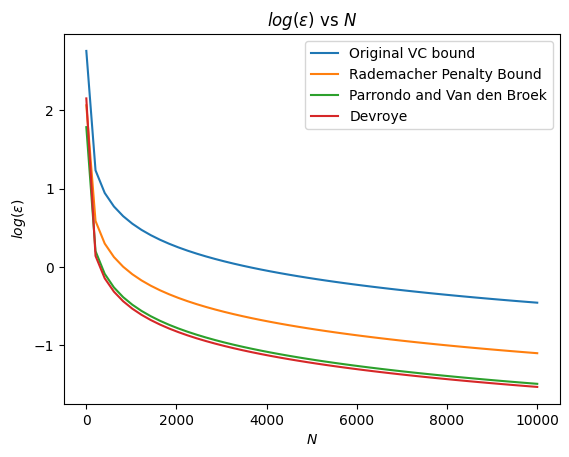

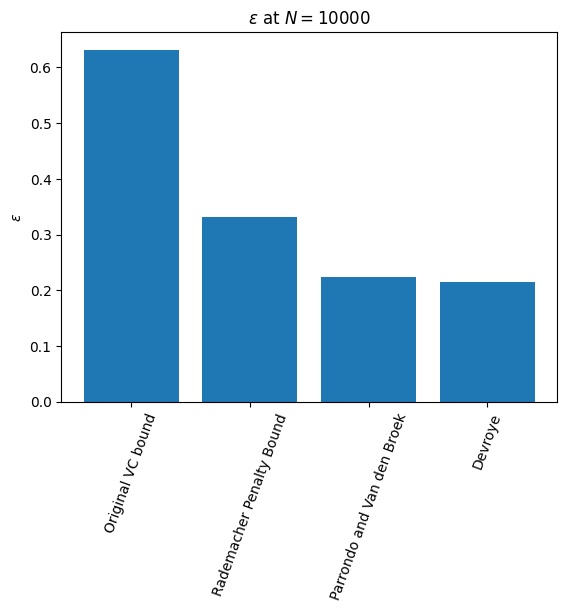

In [11]:
epsilons = [vc_bound(large_N), 
            radermacher_bound(large_N),
            parrando_bound(large_N),
            devroye_bound(large_N)]

bounds = ["Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye"]

plt.title("$log(\epsilon)$ vs $N$")
plt.xlabel("$N$")
plt.ylabel("$log(\epsilon)$")
for i in range(4):
    plt.plot(large_N, np.log(epsilons[i]))
    plt.legend(bounds)
plt.show()


N = 10000
epsilons = [vc_bound(N), 
            radermacher_bound(N),
            parrando_bound(N),
            devroye_bound(N)]

bounds = ("Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye")

plt.title("$\epsilon$ at $N=10000$")
plt.ylabel("$\epsilon$")
plt.xticks([0, 1, 2, 3], bounds, rotation=70)

plt.bar(np.arange(4), epsilons)
plt.show()

Problem 3

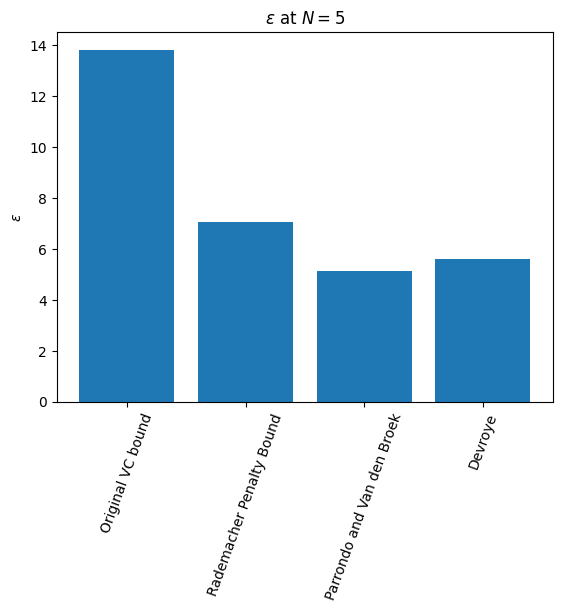

In [12]:
N = 5
epsilons = [vc_bound(N), 
            radermacher_bound(N),
            parrando_bound(N),
            devroye_bound(N)]

bounds = ("Original VC bound", 
          "Rademacher Penalty Bound", 
          "Parrondo and Van den Broek", 
          "Devroye")

plt.title("$\epsilon$ at $N=5$")
plt.ylabel("$\epsilon$")
plt.xticks([0, 1, 2, 3], bounds, rotation=70)

plt.bar(np.arange(4), epsilons)
plt.show()